In [1]:
import numpy as np
#file = "D:\\tuc\\exam10\\Thesis\\Dataset\\CMU_clips_no_zip.npy"
file = '/home/kyriakos/Desktop/Projects/Dataset/CMU_clips_no_zip.npy'
X = np.load(file, allow_pickle=True)
X = np.reshape(X, (X.shape[0], X.shape[1],X.shape[2]*X.shape[3]))
X = X/np.max(X)
#X=np.abs(X)

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
#file = "D:\\tuc\\exam10\\Thesis\\Dataset\\y.npy"
file = '/home/kyriakos/Desktop/Projects/Dataset/y.npy'
Y = np.load(file, allow_pickle=True)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(Y)


[ 0 53  0 ...  0  0 36]


In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,Y[:1073],test_size = 0.2, random_state = 42)

In [4]:
X_train = X_train.reshape(858, 3198, 186,1)
y_train = y_train.reshape(858,1)
X_test = X_test.reshape(215, 3198, 186,1)
y_test = y_test.reshape(215,1)

In [5]:
print(X_train.shape[1:])

(3198, 186, 1)


In [5]:
del X

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras import utils
from keras.layers import CuDNNLSTM

nNeurons = 32
output_layers = 68
# creating the NN model
model = Sequential()
model.add( LSTM( nNeurons,activation = 'relu' ,return_sequences=True,  input_shape = (3198, 186) ) )
model.add( Dropout(0.2))
model.add( LSTM( nNeurons ,activation = 'relu') )
model.add( Dropout(0.2))
model.add(Flatten())
model.add( Dense( output_layers, activation = 'softmax' ) )

opt = tf.keras.optimizers.Adam(learning_rate =1e-3, decay=1e-5)
model.compile( loss = 'mse',  optimizer = opt, metrics = ['accuracy'] )
model.summary()

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
#filepath = "weights-improvement-{epoch:02d}-{loss:.4f}-biggeer.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose = 1, save_best_only=True, mode = 'min')
#callbacks_list = [checkpoint]

2021-12-28 14:10:12.191730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-28 14:10:12.191748: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-28 14:10:13.958017: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-28 14:10:13.958041: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kyriakos-GL72M-7RDX): /proc/driver/nvidia/version does not exist
2021-12-28 14:10:13.958263: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations: 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3198, 32)          28032     
                                                                 
 dropout (Dropout)           (None, 3198, 32)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 68)                2244      
                                                                 
Total params: 38,596
Trainable params: 38,596
Non-traina

In [6]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=3, batch_size=64)
#h=model.fit(X_train, y_train, epochs = 30, batch_size=64) #callbacks=callbacks_list)
#model.save('cmuclassifier.model')
preds = model.predict(X_test)

#y_pred = model.predict(X_test)

2021-12-28 14:10:19.140012: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2041449696 exceeds 10% of free system memory.


Epoch 1/3
14/14 [==============================] - ETA: 0s - loss: 812.3058 - accuracy: 0.0128

2021-12-28 14:10:54.449187: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 511552080 exceeds 10% of free system memory.


14/14 [==============================] - 37s 3s/step - loss: 812.3058 - accuracy: 0.0128 - val_loss: 947.2249 - val_accuracy: 0.0093
Epoch 2/3
14/14 [==============================] - 38s 3s/step - loss: 812.3058 - accuracy: 0.0105 - val_loss: 947.2249 - val_accuracy: 0.0140
Epoch 3/3
14/14 [==============================] - 39s 3s/step - loss: 812.3060 - accuracy: 0.0105 - val_loss: 947.2249 - val_accuracy: 0.0140


2021-12-28 14:12:13.970286: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 511552080 exceeds 10% of free system memory.


In [9]:
y_pred = model.predict(X_test)
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))


a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 100.0


In [11]:
#Converting predictions to label

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=3, batch_size=128)



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


2021-12-28 11:49:16.435990: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2041449696 exceeds 10% of free system memory.


Epoch 1/3
7/7 [==============================] - 25s 4s/step - loss: 0.4359 - accuracy: 0.5641 - val_loss: 0.3953 - val_accuracy: 0.6047
Epoch 2/3
7/7 [==============================] - 25s 4s/step - loss: 0.4359 - accuracy: 0.5641 - val_loss: 0.3953 - val_accuracy: 0.6047
Epoch 3/3
7/7 [==============================] - 29s 4s/step - loss: 0.4359 - accuracy: 0.5641 - val_loss: 0.3953 - val_accuracy: 0.6047


KeyError: 'acc'

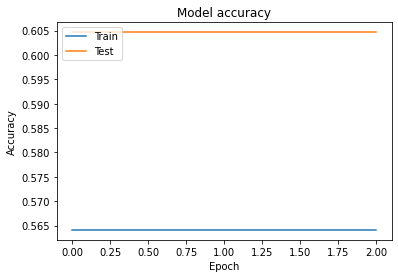

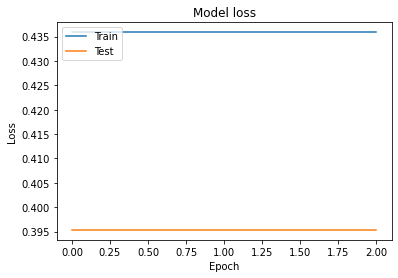

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [3]:
model = Sequential()
model.add(LSTM(16, input_shape=(x_train.shape[1:]), activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(16, activation='tanh'))
model.add(Dropout(0.1))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 16)            2880      
                                                                 
 dropout (Dropout)           (None, 28, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                1

In [4]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 23s 10ms/step - loss: 1.1201 - accuracy: 0.6109 - val_loss: 0.4455 - val_accuracy: 0.8755
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5410 - accuracy: 0.8378 - val_loss: 0.2522 - val_accuracy: 0.9310
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4005 - accuracy: 0.8856 - val_loss: 0.1965 - val_accuracy: 0.9430
